In [2]:
pip install envirocar-py --upgrade

Requirement already up-to-date: envirocar-py in /opt/anaconda3/lib/python3.7/site-packages (0.0.2)


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


# Package loading and basic configurations

In [4]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy as sp
import folium 

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Düsseldorf (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [5]:
bbox = BboxSelector([
    6.7545318603515625, # min_x
    51.19655766797793, # min_y
    6.837615966796874, # max_x
    51.24859296175531  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
#display output
track_df


,id,time,geometry,Intake Temperature.value,Intake Temperature.unit,GPS Bearing.value,GPS Bearing.unit,Speed.value,Speed.unit,GPS Speed.value,...,track.appVersion,track.touVersion,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,Intake Pressure.value,Intake Pressure.unit,Calculated MAF.value,Calculated MAF.unit
0,5c914e2d44ea850302816c0c,2019-03-19T18:59:56,POINT (6.77171 51.23097),36.000000,c,10.765564,deg,38.000000,km/h,38.448582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5c914e2d44ea850302816c0e,2019-03-19T18:59:58,POINT (6.77172 51.23123),36.000000,c,6.199196,deg,39.000000,km/h,39.391880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5c914e2d44ea850302816c0f,2019-03-19T18:59:59,POINT (6.77172 51.23134),NaN,NaN,5.546331,deg,38.000000,km/h,37.426327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5c914e2d44ea850302816c10,2019-03-19T19:00:02,POINT (6.77172 51.23154),36.000000,c,NaN,NaN,36.000000,km/h,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5c914e2d44ea850302816c11,2019-03-19T19:00:03,POINT (6.77172 51.23173),36.000000,c,1.603290,deg,38.000000,km/h,37.458496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,578a8d86e4b086b281a8f551,2016-07-16T11:57:51,POINT (6.77924 51.22370),45.999999,c,349.831640,deg,16.314505,km/h,31.706002,...,NaN,NaN,NaN,NaN,NaN,NaN,37.736434,kPa,3.194601,g/s
310,578a8d86e4b086b281a8f552,2016-07-16T11:57:56,POINT (6.77929 51.22384),45.999999,c,28.147209,deg,0.988575,km/h,8.439734,...,NaN,NaN,NaN,NaN,NaN,NaN,36.362738,kPa,3.041045,g/s
311,578a8d86e4b086b281a8f553,2016-07-16T11:58:01,POINT (6.77949 51.22381),46.346853,c,61.391709,deg,3.566974,km/h,7.919817,...,NaN,NaN,NaN,NaN,NaN,NaN,83.569035,kPa,8.508231,g/s
312,578a8d86e4b086b281a8f554,2016-07-16T11:58:06,POINT (6.77943 51.22382),45.999999,c,10.376024,deg,12.975335,km/h,3.712388,...,NaN,NaN,NaN,NaN,NaN,NaN,33.717421,kPa,4.842824,g/s


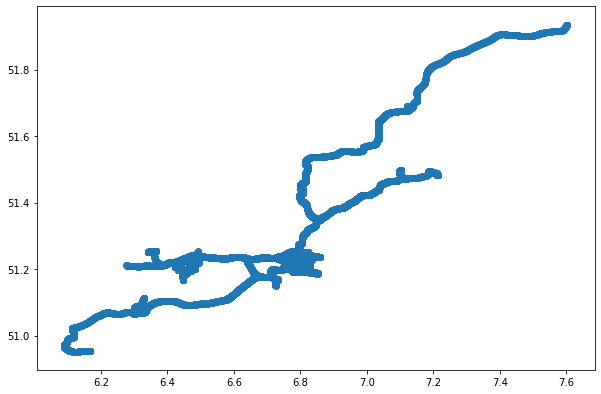

In [6]:
track_df.plot(figsize=(10, 12))

In [7]:
#Data types in data sets (Columns)
len(track_df.dtypes)

54

In [31]:
#track_df summary statistics
track_df.describe()

,Intake Temperature.value,GPS Bearing.value,Speed.value,GPS Speed.value,GPS VDOP.value,MAF.value,Consumption.value,GPS PDOP.value,CO2.value,GPS Accuracy.value,...,track.length,sensor.engineDisplacement,sensor.constructionYear,O2 Lambda Voltage.value,O2 Lambda Voltage ER.value,Intake Pressure.value,Calculated MAF.value,lat,lng,speed
count,24601.000000,25108.000000,25866.000000,25863.000000,25852.000000,21617.000000,18074.000000,25852.000000,18074.000000,25866.000000,...,25866.000000,25866.000000,25866.000000,2366.000000,2366.000000,21630.000000,1855.000000,25866.000000,25866.000000,25866.000000
mean,23.798800,162.117124,64.119391,63.830182,1.565051,18.207039,4.281924,2.014663,10.062522,6.879681,...,52.171340,1579.452215,2007.116485,2.618031,0.700311,70.011176,11.419955,51.276429,6.714084,64.119391
std,10.892993,98.847954,44.864223,44.407435,11.099550,19.049667,3.739783,12.154880,8.788490,5.773195,...,30.006340,245.680685,5.770868,0.994452,0.664658,46.216203,9.066095,0.160621,0.230415,44.864223
min,2.000000,0.000000,0.000000,-14.894578,0.570198,0.000000,0.000000,0.800000,0.000000,1.500000,...,0.000533,998.000000,2000.000000,0.000000,0.000000,11.000000,0.000000,50.951820,6.088097,0.000000
25%,16.999999,78.572820,27.000000,26.314272,0.749471,4.623821,1.152109,1.000000,2.707456,3.000000,...,31.869596,1400.000000,2001.000000,2.496294,0.134575,33.421653,3.716581,51.211013,6.541529,27.000000
50%,23.000001,143.474922,58.303383,58.071599,1.100000,12.037023,2.850021,1.500000,6.697548,4.000000,...,42.615977,1598.000000,2003.000000,2.849344,0.299233,59.000002,7.999972,51.232272,6.754259,58.303383
75%,32.000001,256.207136,105.882357,106.542763,1.500000,25.952661,6.725406,1.787759,15.804703,8.347033,...,73.874668,1598.000000,2013.000000,3.179938,1.004820,95.823344,18.726181,51.252267,6.808342,105.882357
max,53.000000,359.944824,255.000008,176.454134,1195.514560,144.659820,20.275579,1194.957256,47.647610,162.365980,...,121.932480,2200.000000,2015.000000,4.999878,1.999970,255.000008,46.186573,51.935976,7.602978,255.000008


# Inspecting a single Track

In [33]:
#grouping by track.id
track_df.groupby(track_df['track.id']).count()

,id,time,geometry,Intake Temperature.value,Intake Temperature.unit,GPS Bearing.value,GPS Bearing.unit,Speed.value,Speed.unit,GPS Speed.value,...,O2 Lambda Voltage.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,Intake Pressure.value,Intake Pressure.unit,Calculated MAF.value,Calculated MAF.unit,lat,lng,speed
track.id,,,,,,,,,,,,,,,,,,,,,
578a8d86e4b086b281a8f419,314,314,314,314,314,264,264,314,314,314,...,0,0,0,314,314,314,314,314,314,314
578a8d90e4b086b281a8f7cb,375,375,375,375,375,356,356,375,375,375,...,0,0,0,375,375,375,375,375,375,375
578e27bee4b086b281b382eb,490,490,490,490,490,490,490,490,490,490,...,0,0,0,490,490,0,0,490,490,490
57936bcfe4b086b281bbfab0,263,263,263,263,263,263,263,263,263,263,...,0,0,0,263,263,0,0,263,263,263
57936bd2e4b086b281bc00c2,292,292,292,292,292,292,292,292,292,292,...,0,0,0,292,292,0,0,292,292,292
5794715ce4b086b281bd4015,235,235,235,235,235,232,232,235,235,235,...,0,0,0,235,235,0,0,235,235,235
57a0cb9fe4b086b281cc6d4d,378,378,378,378,378,378,378,378,378,378,...,0,0,0,378,378,0,0,378,378,378
57a0cba2e4b086b281cc71bf,592,592,592,592,592,592,592,592,592,592,...,0,0,0,592,592,0,0,592,592,592
57a219aee4b086b281cdab16,344,344,344,344,344,344,344,344,344,344,...,0,0,0,344,344,0,0,344,344,344


,id,time,geometry,Intake Temperature.value,Intake Temperature.unit,GPS Bearing.value,GPS Bearing.unit,Speed.value,Speed.unit,GPS Speed.value,...,O2 Lambda Voltage.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,Intake Pressure.value,Intake Pressure.unit,Calculated MAF.value,Calculated MAF.unit,lat,lng,speed
0,588a2520e4b04a0d7328563a,2017-01-26T12:10:50,POINT (6.78650 51.22248),11.0,c,205.131939,deg,34.425926,km/h,34.092739,...,V,0.000000,ratio,113.952576,kPa,NaN,NaN,51.222484,6.786499,34.425926
1,588a2520e4b04a0d7328563c,2017-01-26T12:10:55,POINT (6.78621 51.22217),10.0,c,203.665443,deg,21.765364,km/h,21.958930,...,V,0.000000,ratio,110.654226,kPa,NaN,NaN,51.222172,6.786211,21.765364
2,588a2520e4b04a0d7328563d,2017-01-26T12:11:00,POINT (6.78604 51.22199),10.0,c,203.393434,deg,22.982685,km/h,22.235136,...,V,0.000000,ratio,138.653883,kPa,NaN,NaN,51.221985,6.786041,22.982685
3,588a2520e4b04a0d7328563e,2017-01-26T12:11:05,POINT (6.78585 51.22173),10.0,c,203.767578,deg,21.038050,km/h,20.675094,...,V,0.000000,ratio,110.386789,kPa,NaN,NaN,51.221735,6.785853,21.038050
4,588a2520e4b04a0d7328563f,2017-01-26T12:11:10,POINT (6.78564 51.22143),9.0,c,204.020293,deg,33.000000,km/h,31.799121,...,V,0.000000,ratio,111.918617,kPa,NaN,NaN,51.221429,6.785636,33.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,588a2520e4b04a0d732857a5,2017-01-26T12:41:26,POINT (6.45375 51.18727),6.0,c,168.168699,deg,19.394649,km/h,8.302004,...,V,0.138082,ratio,110.441633,kPa,NaN,NaN,51.187271,6.453747,19.394649
363,588a2520e4b04a0d732857a6,2017-01-26T12:41:31,POINT (6.45385 51.18715),6.0,c,164.207657,deg,33.999999,km/h,11.392532,...,V,0.325043,ratio,125.893814,kPa,NaN,NaN,51.187153,6.453847,33.999999
364,588a2520e4b04a0d732857a7,2017-01-26T12:41:36,POINT (6.45411 51.18684),6.0,c,153.682077,deg,41.340959,km/h,32.441709,...,V,0.132607,ratio,110.477790,kPa,NaN,NaN,51.186839,6.454106,41.340959
365,588a2520e4b04a0d732857a8,2017-01-26T12:41:41,POINT (6.45457 51.18635),6.0,c,149.977628,deg,48.154395,km/h,40.267289,...,V,0.245081,ratio,125.311402,kPa,NaN,NaN,51.186352,6.454569,48.154395


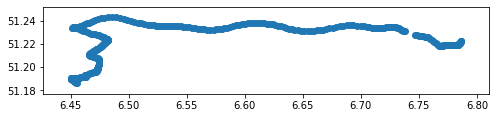

In [40]:
#selecting one track
some_track_id = track_df['track.id'].unique()[4]
some_track = track_df[track_df['track.id'] == some_track_id]
some_track.plot(figsize= (8, 10))
some_track

In [36]:
#check data types
track_df.dtypes

id                              object
time                            object
geometry                      geometry
Intake Temperature.value       float64
Intake Temperature.unit         object
GPS Bearing.value              float64
GPS Bearing.unit                object
Speed.value                    float64
Speed.unit                      object
GPS Speed.value                float64
GPS Speed.unit                  object
GPS VDOP.value                 float64
GPS VDOP.unit                   object
MAF.value                      float64
MAF.unit                        object
Consumption.value              float64
Consumption.unit                object
GPS PDOP.value                 float64
GPS PDOP.unit                   object
CO2.value                      float64
CO2.unit                        object
GPS Accuracy.value             float64
GPS Accuracy.unit               object
Rpm.value                      float64
Rpm.unit                        object
GPS Altitude.value       

In [37]:
#finding length of track 
some_track_length = some_track['track.length'].sum()
some_track_length

12467.933760674987

In [38]:
#drop non exisiting values
some_track['Engine Load.value'].dropna

<bound method Series.dropna of 0       0.000000
1       0.000000
2      46.179983
3      17.222569
4      34.087207
         ...    
362    29.893656
363     6.307307
364    40.798678
365    31.690009
366    33.683798
Name: Engine Load.value, Length: 367, dtype: float64>

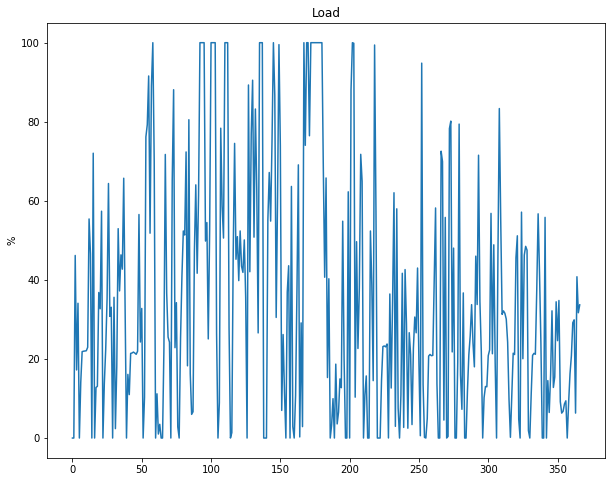

In [45]:
ax = some_track['Engine Load.value'].plot(figsize= (10, 8))
ax.set_title("Load")
ax.set_ylabel(some_track['Engine Load.unit'][0])
ax

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [46]:
import folium

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=13)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='blue').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [47]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=15,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=6.837615966796874,
    latitude=51.24859296175531,
    zoom=10,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state , 
    mapbox_key="pk.eyJ1IjoiZGF2aWRzaW1hbHNpbmEiLCJhIjoiY2szNzQ5OHdwMDgwcDNjbzltcjJsOXV3MSJ9.v3su3BJnEmuHdka9UaBYAA"
)
r.to_html('tracks_muenster.html', iframe_width=900)

'/Users/davidsimduwaalsina/Documents/GitHub/envirocar-py/examples/tracks_muenster.html'

# VISUALIZATION WITH OTHER LIBRARIES 

In [17]:
import seaborn as sns

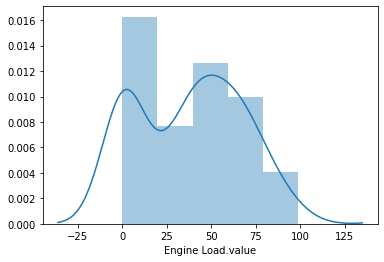

In [18]:
x = some_track['Engine Load.value']
sns.distplot(x);

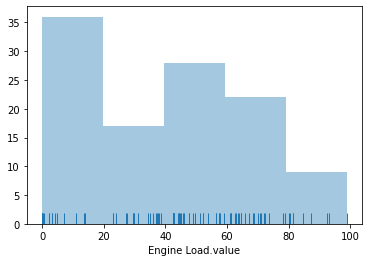

In [50]:
sns.distplot(x, kde=False, rug=True);

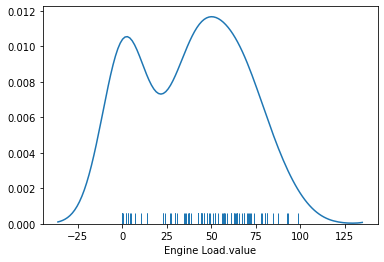

In [20]:
sns.distplot(x, hist=False, rug=True);

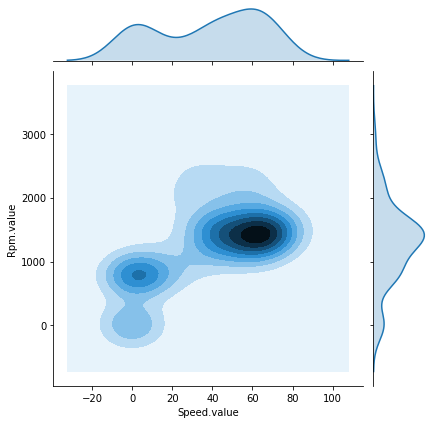

In [21]:
sns.jointplot(x='Speed.value', y = 'Rpm.value', data= some_track, kind='kde');